In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [2]:
sns.set_style('whitegrid')
plt.style.use('seaborn-bright')

#### Reading the CSV File

In [3]:
cars = pd.read_csv(r"C:\Users\Dell\Downloads\cars_data.csv")
cars.head()

,Unnamed: 0,Model,Mileage in mi,Dealer Name,Rating,Rating Count,Price in $,Brand Name,Year
0,0,"['XC90', 'T6', 'Momentum', '7', 'Passenger']","12,145 mi.",Bedard Bros,4.2,90,"$48,995",Volvo,2020
1,1,"['V90', 'Cross', 'Country', 'B']","6,055 mi.",Crest Volvo Cars,4.8,1606,"$59,437",Volvo,2022
2,2,"['XC40', 'T5', 'R-Design']","40,783 mi.",Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000",Volvo,2020
3,3,"['XC60', 'Inscription']","2,442 mi.",Gengras Volvo,4.5,159,"$56,325",Volvo,2022
4,4,"['S90', 'Hybrid', 'T8', 'R-Design']","36,555 mi.",Ken Pollock Volvo Cars,4.9,644,"$53,990",Volvo,2020


### Problem : 
* Removed Unwanted Coloumn

In [4]:
cars.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
cars.head()

,Model,Mileage in mi,Dealer Name,Rating,Rating Count,Price in $,Brand Name,Year
0,"['XC90', 'T6', 'Momentum', '7', 'Passenger']","12,145 mi.",Bedard Bros,4.2,90,"$48,995",Volvo,2020
1,"['V90', 'Cross', 'Country', 'B']","6,055 mi.",Crest Volvo Cars,4.8,1606,"$59,437",Volvo,2022
2,"['XC40', 'T5', 'R-Design']","40,783 mi.",Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000",Volvo,2020
3,"['XC60', 'Inscription']","2,442 mi.",Gengras Volvo,4.5,159,"$56,325",Volvo,2022
4,"['S90', 'Hybrid', 'T8', 'R-Design']","36,555 mi.",Ken Pollock Volvo Cars,4.9,644,"$53,990",Volvo,2020


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          835 non-null    object 
 1   Mileage in mi  835 non-null    object 
 2   Dealer Name    835 non-null    object 
 3   Rating         820 non-null    float64
 4   Rating Count   835 non-null    int64  
 5   Price in $     835 non-null    object 
 6   Brand Name     835 non-null    object 
 7   Year           835 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 52.3+ KB


In [6]:
pd.to_datetime(cars.Year, format='%Y')

0     2020-01-01
1     2022-01-01
2     2020-01-01
3     2022-01-01
4     2020-01-01
         ...    
830   2020-01-01
831   2021-01-01
832   2019-01-01
833   2019-01-01
834   2018-01-01
Name: Year, Length: 835, dtype: datetime64[ns]

In [7]:
cars

,Model,Mileage in mi,Dealer Name,Rating,Rating Count,Price in $,Brand Name,Year
0,"['XC90', 'T6', 'Momentum', '7', 'Passenger']","12,145 mi.",Bedard Bros,4.2,90,"$48,995",Volvo,2020
1,"['V90', 'Cross', 'Country', 'B']","6,055 mi.",Crest Volvo Cars,4.8,1606,"$59,437",Volvo,2022
2,"['XC40', 'T5', 'R-Design']","40,783 mi.",Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000",Volvo,2020
3,"['XC60', 'Inscription']","2,442 mi.",Gengras Volvo,4.5,159,"$56,325",Volvo,2022
4,"['S90', 'Hybrid', 'T8', 'R-Design']","36,555 mi.",Ken Pollock Volvo Cars,4.9,644,"$53,990",Volvo,2020
...,...,...,...,...,...,...,...,...
830,"['Escalade', 'ESV', 'Premium', 'Luxury']","39,558 mi.",Royal Buick GMC Cadillac Tucson,4.9,1494,"$69,990",Cadillac,2020
831,"['CT5', 'Luxury', 'RWD']","10,811 mi.","Delaware Cadillac, Subaru, Kia",4.8,962,"$39,991",Cadillac,2021
832,"['ATS', '2.0L', 'Turbo', 'Luxury']","23,875 mi.",Paul Conte Cadillac,4.8,1385,"$34,995",Cadillac,2019
833,"['CTS', '2.0L', 'Turbo', 'Luxury']","32,992 mi.",Cole Valley Cadillac,4.6,133,"$34,777",Cadillac,2019


### Problem :
* We have changed Mileage in mi to Miles Travelled
* Miles is in the Object we have changes into int

In [8]:
cars.rename(columns = {'Mileage in mi':"Miles Travelled"}, inplace = True)
cars.rename(columns = {'Rating Count':"Number of Reviews"}, inplace = True)

In [9]:
cars['Miles Travelled']=cars['Miles Travelled'].apply(lambda x:x.strip('mi.'))

In [10]:
cars['Miles Travelled'] = cars['Miles Travelled'].apply(lambda x:x.replace(",",""))
cars['Miles Travelled'] = cars['Miles Travelled'].astype(int, errors = 'raise')
cars.head()

,Model,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $,Brand Name,Year
0,"['XC90', 'T6', 'Momentum', '7', 'Passenger']",12145,Bedard Bros,4.2,90,"$48,995",Volvo,2020
1,"['V90', 'Cross', 'Country', 'B']",6055,Crest Volvo Cars,4.8,1606,"$59,437",Volvo,2022
2,"['XC40', 'T5', 'R-Design']",40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000",Volvo,2020
3,"['XC60', 'Inscription']",2442,Gengras Volvo,4.5,159,"$56,325",Volvo,2022
4,"['S90', 'Hybrid', 'T8', 'R-Design']",36555,Ken Pollock Volvo Cars,4.9,644,"$53,990",Volvo,2020


### Problem :
* We Rearrang the coloumn names
* So we have used the reindex function

In [11]:
cars = cars.reindex(['Brand Name', 'Model', 'Year', 'Miles Travelled', 'Dealer Name', 'Rating', 'Number of Reviews', 'Price in $'], axis = 1)

In [12]:
cars

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,"['XC90', 'T6', 'Momentum', '7', 'Passenger']",2020,12145,Bedard Bros,4.2,90,"$48,995"
1,Volvo,"['V90', 'Cross', 'Country', 'B']",2022,6055,Crest Volvo Cars,4.8,1606,"$59,437"
2,Volvo,"['XC40', 'T5', 'R-Design']",2020,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000"
3,Volvo,"['XC60', 'Inscription']",2022,2442,Gengras Volvo,4.5,159,"$56,325"
4,Volvo,"['S90', 'Hybrid', 'T8', 'R-Design']",2020,36555,Ken Pollock Volvo Cars,4.9,644,"$53,990"
...,...,...,...,...,...,...,...,...
830,Cadillac,"['Escalade', 'ESV', 'Premium', 'Luxury']",2020,39558,Royal Buick GMC Cadillac Tucson,4.9,1494,"$69,990"
831,Cadillac,"['CT5', 'Luxury', 'RWD']",2021,10811,"Delaware Cadillac, Subaru, Kia",4.8,962,"$39,991"
832,Cadillac,"['ATS', '2.0L', 'Turbo', 'Luxury']",2019,23875,Paul Conte Cadillac,4.8,1385,"$34,995"
833,Cadillac,"['CTS', '2.0L', 'Turbo', 'Luxury']",2019,32992,Cole Valley Cadillac,4.6,133,"$34,777"


### Problem :
* We have removed all special charaters in Models

In [13]:
cars['Model'] = cars['Model'].apply(lambda x:x.replace(",",""))

In [14]:
cars['Model'] = cars['Model'].apply(lambda x:x.replace("'",""))
cars

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,[XC90 T6 Momentum 7 Passenger],2020,12145,Bedard Bros,4.2,90,"$48,995"
1,Volvo,[V90 Cross Country B],2022,6055,Crest Volvo Cars,4.8,1606,"$59,437"
2,Volvo,[XC40 T5 R-Design],2020,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000"
3,Volvo,[XC60 Inscription],2022,2442,Gengras Volvo,4.5,159,"$56,325"
4,Volvo,[S90 Hybrid T8 R-Design],2020,36555,Ken Pollock Volvo Cars,4.9,644,"$53,990"
...,...,...,...,...,...,...,...,...
830,Cadillac,[Escalade ESV Premium Luxury],2020,39558,Royal Buick GMC Cadillac Tucson,4.9,1494,"$69,990"
831,Cadillac,[CT5 Luxury RWD],2021,10811,"Delaware Cadillac, Subaru, Kia",4.8,962,"$39,991"
832,Cadillac,[ATS 2.0L Turbo Luxury],2019,23875,Paul Conte Cadillac,4.8,1385,"$34,995"
833,Cadillac,[CTS 2.0L Turbo Luxury],2019,32992,Cole Valley Cadillac,4.6,133,"$34,777"


In [15]:
cars['Model']=cars['Model'].apply(lambda x:x.strip('['))

In [16]:
cars['Model']=cars['Model'].apply(lambda x:x.strip(']'))
cars

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,XC90 T6 Momentum 7 Passenger,2020,12145,Bedard Bros,4.2,90,"$48,995"
1,Volvo,V90 Cross Country B,2022,6055,Crest Volvo Cars,4.8,1606,"$59,437"
2,Volvo,XC40 T5 R-Design,2020,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,"$40,000"
3,Volvo,XC60 Inscription,2022,2442,Gengras Volvo,4.5,159,"$56,325"
4,Volvo,S90 Hybrid T8 R-Design,2020,36555,Ken Pollock Volvo Cars,4.9,644,"$53,990"
...,...,...,...,...,...,...,...,...
830,Cadillac,Escalade ESV Premium Luxury,2020,39558,Royal Buick GMC Cadillac Tucson,4.9,1494,"$69,990"
831,Cadillac,CT5 Luxury RWD,2021,10811,"Delaware Cadillac, Subaru, Kia",4.8,962,"$39,991"
832,Cadillac,ATS 2.0L Turbo Luxury,2019,23875,Paul Conte Cadillac,4.8,1385,"$34,995"
833,Cadillac,CTS 2.0L Turbo Luxury,2019,32992,Cole Valley Cadillac,4.6,133,"$34,777"


In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         835 non-null    object 
 1   Model              835 non-null    object 
 2   Year               835 non-null    int64  
 3   Miles Travelled    835 non-null    int32  
 4   Dealer Name        835 non-null    object 
 5   Rating             820 non-null    float64
 6   Number of Reviews  835 non-null    int64  
 7   Price in $         835 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 49.1+ KB


### Problem :
* price is in the Object we have changes into int

In [18]:
cars['Price in $'] = cars['Price in $'].apply(lambda x:x.replace(x[0],""))
cars['Price in $'] = cars['Price in $'].apply(lambda x:x.replace(",",""))
cars['Price in $'] = cars['Price in $'].astype(int, errors = 'raise')
cars

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,XC90 T6 Momentum 7 Passenger,2020,12145,Bedard Bros,4.2,90,48995
1,Volvo,V90 Cross Country B,2022,6055,Crest Volvo Cars,4.8,1606,59437
2,Volvo,XC40 T5 R-Design,2020,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,40000
3,Volvo,XC60 Inscription,2022,2442,Gengras Volvo,4.5,159,56325
4,Volvo,S90 Hybrid T8 R-Design,2020,36555,Ken Pollock Volvo Cars,4.9,644,53990
...,...,...,...,...,...,...,...,...
830,Cadillac,Escalade ESV Premium Luxury,2020,39558,Royal Buick GMC Cadillac Tucson,4.9,1494,69990
831,Cadillac,CT5 Luxury RWD,2021,10811,"Delaware Cadillac, Subaru, Kia",4.8,962,39991
832,Cadillac,ATS 2.0L Turbo Luxury,2019,23875,Paul Conte Cadillac,4.8,1385,34995
833,Cadillac,CTS 2.0L Turbo Luxury,2019,32992,Cole Valley Cadillac,4.6,133,34777


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         835 non-null    object 
 1   Model              835 non-null    object 
 2   Year               835 non-null    int64  
 3   Miles Travelled    835 non-null    int32  
 4   Dealer Name        835 non-null    object 
 5   Rating             820 non-null    float64
 6   Number of Reviews  835 non-null    int64  
 7   Price in $         835 non-null    int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 45.8+ KB


In [20]:
cars.isnull().sum()

Brand Name            0
Model                 0
Year                  0
Miles Travelled       0
Dealer Name           0
Rating               15
Number of Reviews     0
Price in $            0
dtype: int64

### Problem :
* There are some Null Values in the Rating
* We removed those values

In [21]:
cars[cars["Rating"].isnull()]

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
527,Chevrolet,Malibu 1LT,2017,42441,Pure Country Chevrolet,NaN,0,19989
536,Chevrolet,Traverse LS,2022,22686,Pure Country Chevrolet,NaN,0,37989
548,Chevrolet,Malibu 1LT,2017,42441,Pure Country Chevrolet,NaN,0,19989
557,Chevrolet,Traverse LS,2022,22686,Pure Country Chevrolet,NaN,0,37989
569,Chevrolet,Malibu 1LT,2017,42441,Pure Country Chevrolet,NaN,0,19989
576,Chevrolet,Traverse LS,2022,22686,Pure Country Chevrolet,NaN,0,37989
590,Chevrolet,Malibu 1LT,2017,42441,Pure Country Chevrolet,NaN,0,19989
599,Chevrolet,Traverse LS,2022,22686,Pure Country Chevrolet,NaN,0,37989
612,Chevrolet,Malibu 1LT,2017,42441,Pure Country Chevrolet,NaN,0,19989
619,Chevrolet,Traverse LS,2022,22686,Pure Country Chevrolet,NaN,0,37989


In [22]:
cars.drop(cars[cars['Number of Reviews'] == 0].index, inplace = True)

In [23]:
cars[cars["Rating"].isnull()]

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $


In [24]:
cars[(cars["Number of Reviews"]==0)]

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $


### Problem :
* We got the Outlier Data from the website of 2023 Cars data so we have drop it

In [25]:
cars[cars["Year"] == 2023]

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
537,Chevrolet,Chevrolet Tahoe Z,2023,2802,Classic Chevrolet Inc,4.4,389,77620
558,Chevrolet,Chevrolet Tahoe Z,2023,2802,Classic Chevrolet Inc,4.4,389,77620
579,Chevrolet,Chevrolet Tahoe Z,2023,2802,Classic Chevrolet Inc,4.4,389,77620
600,Chevrolet,Chevrolet Tahoe Z,2023,2802,Classic Chevrolet Inc,4.4,389,77620
621,Chevrolet,Chevrolet Tahoe Z,2023,2802,Classic Chevrolet Inc,4.4,389,77620
631,Kia,Kia Sportage X-Line,2023,6582,Smart Kia of Davenport,4.8,280,33660
634,Kia,Kia Sportage X-Line,2023,8428,Germain Kia of Columbus,4.4,241,35571
635,Kia,Kia K5 GT-Line,2023,2255,Ferguson Superstore,4.9,5918,35000
653,Kia,Kia Sportage X-Line,2023,6582,Smart Kia of Davenport,4.8,280,33660
656,Kia,Kia Sportage X-Line,2023,8428,Germain Kia of Columbus,4.4,241,35571


In [26]:
cars.drop(cars[cars["Year"]>=2023].index,inplace=True)

In [27]:
cars[cars["Year"] == 2023]

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $


In [28]:
cars.head()

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,XC90 T6 Momentum 7 Passenger,2020,12145,Bedard Bros,4.2,90,48995
1,Volvo,V90 Cross Country B,2022,6055,Crest Volvo Cars,4.8,1606,59437
2,Volvo,XC40 T5 R-Design,2020,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,40000
3,Volvo,XC60 Inscription,2022,2442,Gengras Volvo,4.5,159,56325
4,Volvo,S90 Hybrid T8 R-Design,2020,36555,Ken Pollock Volvo Cars,4.9,644,53990


In [29]:
cars['Year'] = pd.to_datetime(cars['Year'], format='%Y')

In [30]:
cars

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,XC90 T6 Momentum 7 Passenger,2020-01-01,12145,Bedard Bros,4.2,90,48995
1,Volvo,V90 Cross Country B,2022-01-01,6055,Crest Volvo Cars,4.8,1606,59437
2,Volvo,XC40 T5 R-Design,2020-01-01,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,40000
3,Volvo,XC60 Inscription,2022-01-01,2442,Gengras Volvo,4.5,159,56325
4,Volvo,S90 Hybrid T8 R-Design,2020-01-01,36555,Ken Pollock Volvo Cars,4.9,644,53990
...,...,...,...,...,...,...,...,...
830,Cadillac,Escalade ESV Premium Luxury,2020-01-01,39558,Royal Buick GMC Cadillac Tucson,4.9,1494,69990
831,Cadillac,CT5 Luxury RWD,2021-01-01,10811,"Delaware Cadillac, Subaru, Kia",4.8,962,39991
832,Cadillac,ATS 2.0L Turbo Luxury,2019-01-01,23875,Paul Conte Cadillac,4.8,1385,34995
833,Cadillac,CTS 2.0L Turbo Luxury,2019-01-01,32992,Cole Valley Cadillac,4.6,133,34777


In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 834
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Brand Name         800 non-null    object        
 1   Model              800 non-null    object        
 2   Year               800 non-null    datetime64[ns]
 3   Miles Travelled    800 non-null    int32         
 4   Dealer Name        800 non-null    object        
 5   Rating             800 non-null    float64       
 6   Number of Reviews  800 non-null    int64         
 7   Price in $         800 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 50.0+ KB


In [32]:
cars

,Brand Name,Model,Year,Miles Travelled,Dealer Name,Rating,Number of Reviews,Price in $
0,Volvo,XC90 T6 Momentum 7 Passenger,2020-01-01,12145,Bedard Bros,4.2,90,48995
1,Volvo,V90 Cross Country B,2022-01-01,6055,Crest Volvo Cars,4.8,1606,59437
2,Volvo,XC40 T5 R-Design,2020-01-01,40783,Rickenbaugh Cadillac Volvo Cars,4.9,2659,40000
3,Volvo,XC60 Inscription,2022-01-01,2442,Gengras Volvo,4.5,159,56325
4,Volvo,S90 Hybrid T8 R-Design,2020-01-01,36555,Ken Pollock Volvo Cars,4.9,644,53990
...,...,...,...,...,...,...,...,...
830,Cadillac,Escalade ESV Premium Luxury,2020-01-01,39558,Royal Buick GMC Cadillac Tucson,4.9,1494,69990
831,Cadillac,CT5 Luxury RWD,2021-01-01,10811,"Delaware Cadillac, Subaru, Kia",4.8,962,39991
832,Cadillac,ATS 2.0L Turbo Luxury,2019-01-01,23875,Paul Conte Cadillac,4.8,1385,34995
833,Cadillac,CTS 2.0L Turbo Luxury,2019-01-01,32992,Cole Valley Cadillac,4.6,133,34777


In [33]:
cars.shape

(800, 8)

In [34]:
cars.describe()

,Miles Travelled,Rating,Number of Reviews,Price in $
count,800.000000,800.000000,800.000000,800.000000
mean,20872.536250,4.605000,751.330000,51540.766250
std,14975.339208,0.356278,1081.713743,25488.801058
min,369.000000,2.600000,3.000000,22600.000000
25%,7489.000000,4.500000,167.750000,35987.000000
50%,18110.000000,4.700000,426.500000,45497.500000
75%,32736.000000,4.800000,942.000000,59469.000000
max,68117.000000,5.000000,7389.000000,224922.000000


In [35]:
cars.corr()

,Miles Travelled,Rating,Number of Reviews,Price in $
Miles Travelled,1.000000,0.068974,0.106451,-0.230794
Rating,0.068974,1.000000,0.218365,0.061853
Number of Reviews,0.106451,0.218365,1.000000,0.027992
Price in $,-0.230794,0.061853,0.027992,1.000000


In [36]:
cars.skew(axis = 1, skipna = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2440\3341325904.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.skew(axis = 1, skipna = True)


0      1.665957
1      1.952668
2     -0.010911
3      1.990420
4      0.350088
         ...   
830    0.659092
831    1.625139
832    0.343100
833    0.007187
834    0.573316
Length: 800, dtype: float64

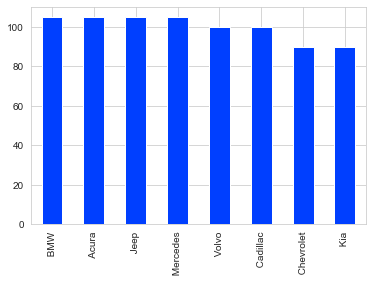

In [37]:
cars["Brand Name"].value_counts().plot(kind = 'bar')
plt.show()

##### Here we can observe that total number of cars are avaliable in brand wise

In [38]:
cars["Price in $"].value_counts()

55000     15
30500     15
44995     10
39995     10
34777     10
          ..
43885      1
25995      1
109998     1
81494      1
44771      1
Name: Price in $, Length: 163, dtype: int64

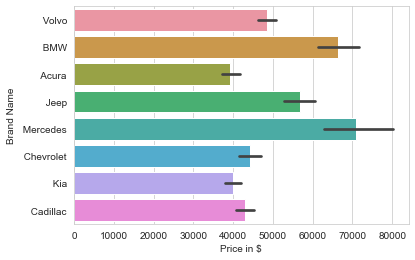

In [39]:
sns.barplot(x = 'Price in $', y = 'Brand Name', data = cars)
plt.show()

##### Here we can observe that luxury cars have more price

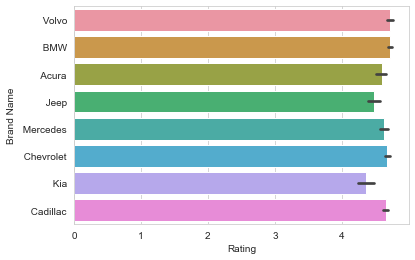

In [40]:
sns.barplot(x = 'Rating', y = 'Brand Name', data = cars)
plt.show()

##### Here we can see that most of the cars are above 4 rating

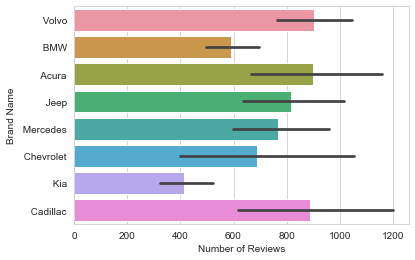

In [41]:
sns.barplot(x = 'Number of Reviews', y = 'Brand Name', data = cars)
plt.show()

##### Here we can observe that Volvo, Acura and Cadillac are near to 900 reviews given by the Customers

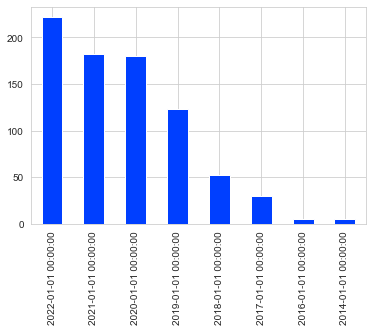

In [42]:
cars.Year.value_counts().plot(kind = 'bar')
plt.show()

### from the above plot we can find that more number of  cars are available more in 2022

In [43]:
cars["Miles Travelled"].value_counts()

12145    5
4286     5
18110    5
45856    5
20310    5
        ..
2000     1
16443    1
19015    1
42626    1
5520     1
Name: Miles Travelled, Length: 172, dtype: int64

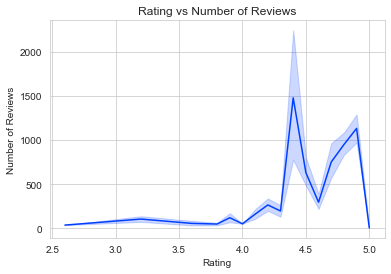

In [44]:
sns.lineplot(x = 'Rating', y = 'Number of Reviews', data = cars)
plt.title("Rating vs Number of Reviews")
plt.show()

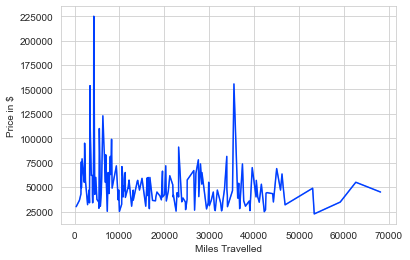

In [45]:
sns.lineplot(x = 'Miles Travelled', y = 'Price in $', data = cars)
plt.show()

##### Here we can observe that more aged cars have travelled more miles

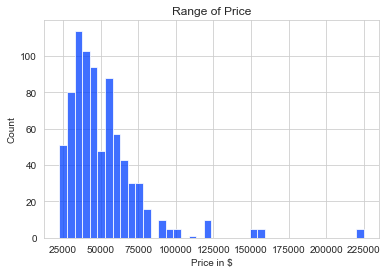

In [46]:
sns.histplot(data = cars, x = 'Price in $')
plt.title("Range of Price")
plt.show()

##### Here we can observe that number of cars more in below 100,000$

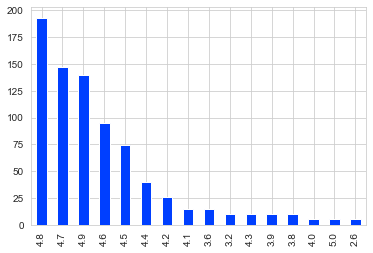

In [47]:
cars.Rating.value_counts().plot(kind = 'bar')
plt.show()

##### Here we can observe that there are more number of cars avaliable in the 4.8 Rating

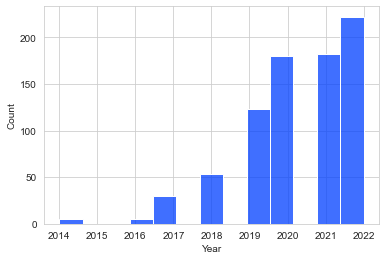

In [48]:
sns.histplot(data = cars, x = 'Year')
plt.show()

##### Here we can observe that there more number of cars avaliable from 2020

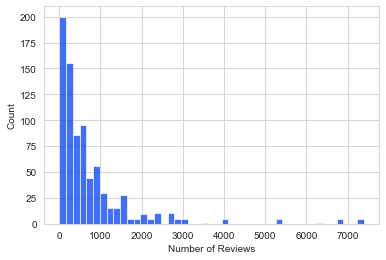

In [49]:
sns.histplot(data = cars, x = 'Number of Reviews')
plt.show()

##### Here we can observe that there less than 1000 reviewers

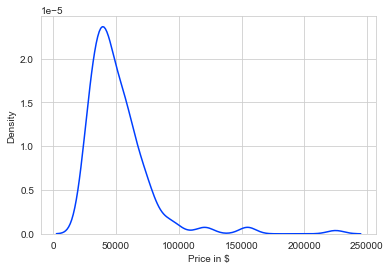

In [50]:
sns.kdeplot(cars["Price in $"])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


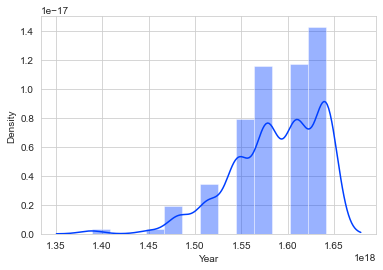

In [51]:
sns.distplot(cars.Year)
plt.show()

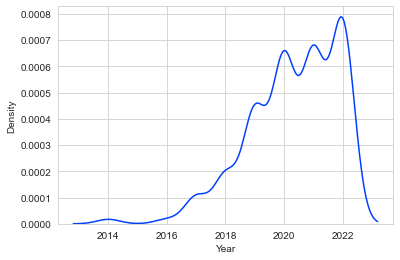

In [52]:
sns.kdeplot(cars.Year)
plt.show()

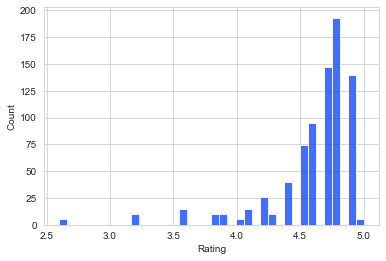

In [53]:
sns.histplot(data = cars, x = 'Rating')
plt.show()

##### Here we can observe that there more number of cars are rated above 4.5

In [54]:
cars["Dealer Name"].value_counts()

BMW of Fort Wayne/MINI of Fort Wayne    20
Bergstrom Luxury on Victory Lane        15
BMW of Fairfield                        13
Harper Acura                            10
John Elway Cadillac                     10
                                        ..
i.g. Burton Imports                      2
Pacific BMW                              1
Global Imports BMW                       1
Walter's Mercedes-Benz of Riverside      1
Century West BMW                         1
Name: Dealer Name, Length: 148, dtype: int64

In [55]:
cars["Number of Reviews"].value_counts()

387     20
50      15
290     15
944     15
7       13
        ..
27       2
6303     1
447      1
3552     1
834      1
Name: Number of Reviews, Length: 138, dtype: int64

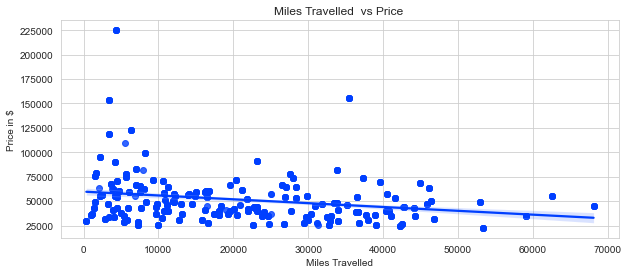

In [56]:
plt.figure(figsize = (10, 4))
sns.regplot(x = 'Miles Travelled', y = 'Price in $', data = cars)
plt.title("Miles Travelled  vs Price ")
plt.show()

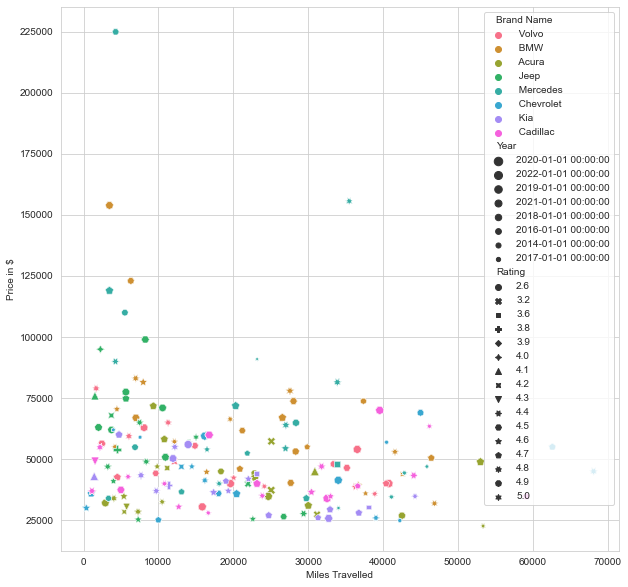

In [57]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'Miles Travelled', y = 'Price in $', data = cars, hue = 'Brand Name', style = 'Rating', size = 'Year')
plt.show()

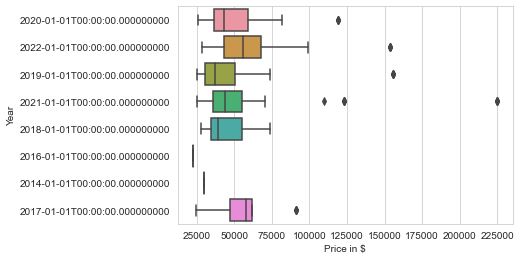

In [58]:
sns.boxplot(x = "Price in $", y = "Year", data = cars)
plt.show()

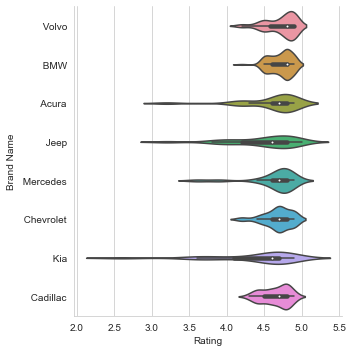

In [59]:
sns.catplot(x = "Rating", y='Brand Name', data = cars, kind = 'violin')
plt.show()

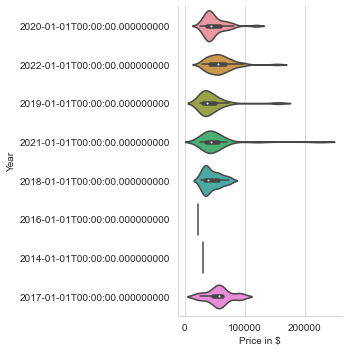

In [60]:
sns.catplot(x = "Price in $", y = "Year", data = cars, kind = 'violin')
plt.show()

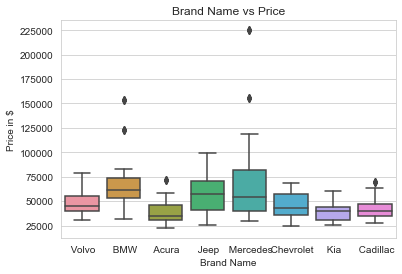

In [61]:
sns.boxplot(x = "Brand Name", y = "Price in $", data = cars)
plt.title("Brand Name vs Price")
plt.show()

#### from the above plot we found that mercedes benz has more when compared to others brand cars.

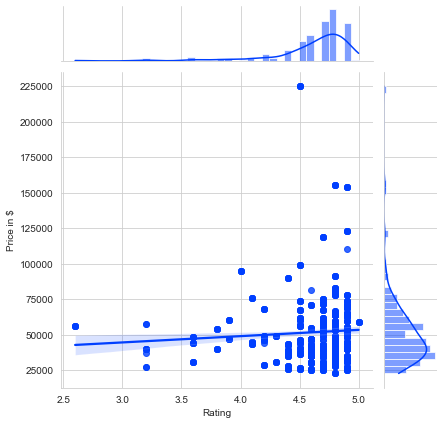

In [62]:
sns.jointplot(x = "Rating", y = "Price in $", data = cars, kind = 'reg')
plt.show()

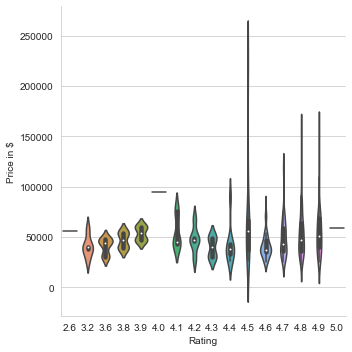

In [63]:
sns.catplot(x = "Rating", y = "Price in $", data = cars, kind = 'violin')
plt.show()

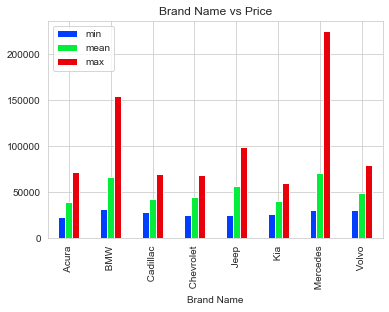

In [64]:
cars.groupby(['Brand Name'])["Price in $"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.title("Brand Name vs Price")
plt.show()

##### Here we can observe that there are max number of cars avaliable in the Mercedes

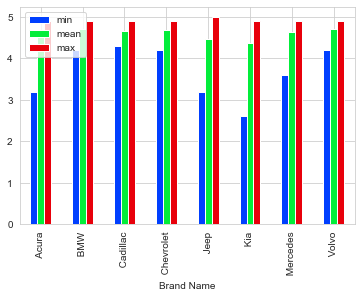

In [65]:
cars.groupby(['Brand Name'])["Rating"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

##### Here we can observe that there are minimum rating from Kia and mean is higher in the BMW

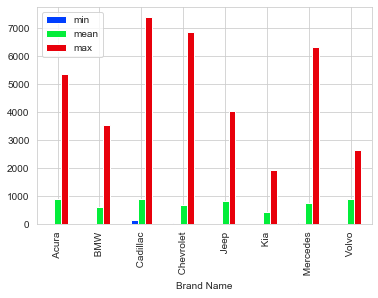

In [66]:
cars.groupby(['Brand Name'])["Number of Reviews"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

##### Here we can observe that there are minimum rating count from Cardillac and maximum rating count from Cardillac

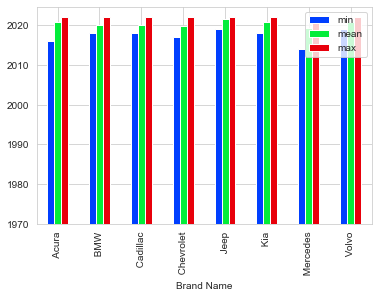

In [67]:
cars.groupby(['Brand Name'])["Year"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

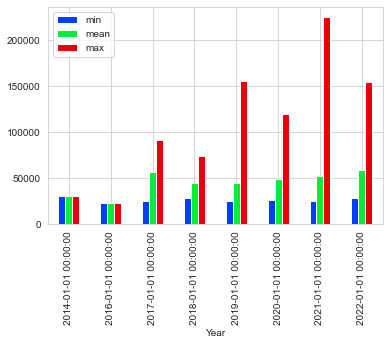

In [68]:
cars.groupby(['Year'])["Price in $"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

##### Here we can observe that in the year of 2014 and 2016 the price of min, max and mean values are same

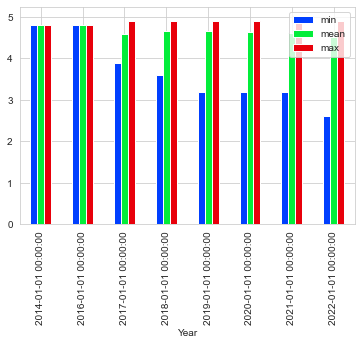

In [69]:
cars.groupby(['Year'])["Rating"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

##### Here we can observe that in the year of 2014 and 2016 the rating min, max and mean values are same

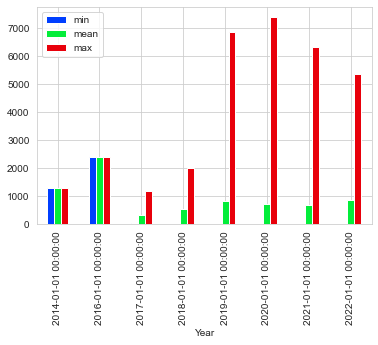

In [70]:
cars.groupby(['Year'])["Number of Reviews"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

##### Here we can observe that in the year of 2014 and 2016 the rating count min, max and mean values are same

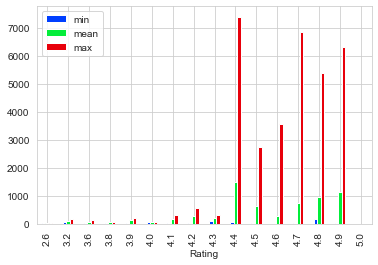

In [71]:
cars.groupby(['Rating'])["Number of Reviews"].agg({'min', 'mean', 'max'}).plot(kind = 'bar')
plt.show()

##### Here we can observe that mean value of rating is higher

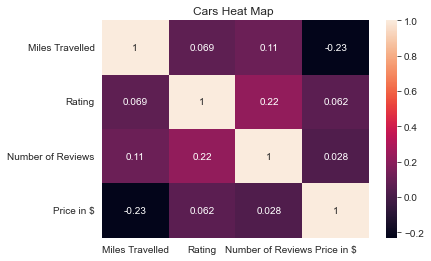

In [72]:
sns.heatmap(cars.corr(), annot = True)
plt.title("Cars Heat Map ")
plt.show()
#### Here we can observe that Miles Travelled and Price in $ are negatively corelated.

#### From the above plot we found that miles Travelled is negatively correlated with Price.As Miles Travelled increases Price decreases.


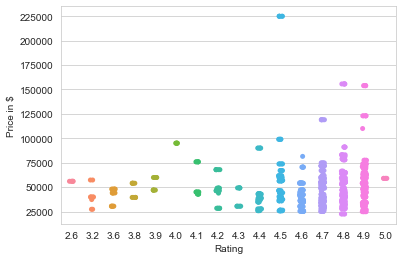

In [73]:
sns.stripplot(x='Rating',y='Price in $',data=cars)
plt.show()

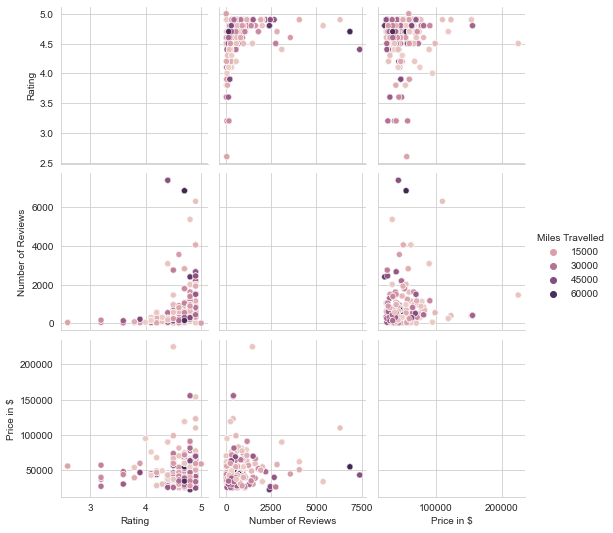

In [74]:
sns.pairplot(cars,hue='Miles Travelled') # useful if few numerical variables are to be analysed
plt.show()

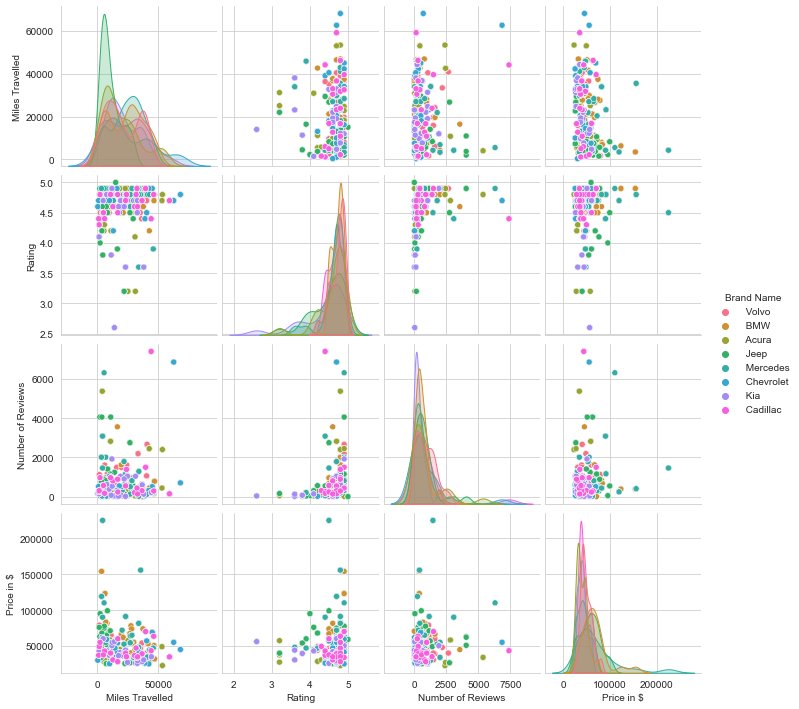

In [75]:
sns.pairplot(cars,hue='Brand Name') # useful if few numerical variables are to be analysed
plt.show()

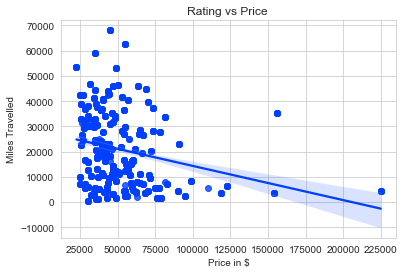

In [82]:
sns.regplot(x='Price in $',y='Miles Travelled',data=cars)
plt.title("Rating vs Price ")
plt.show()

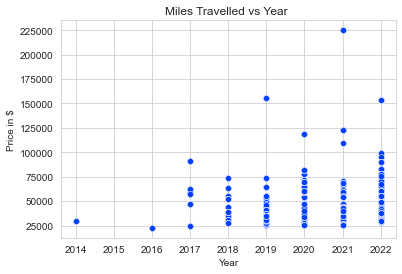

In [84]:
sns.scatterplot(x='Year',y='Price in $',data=cars)
plt.title("Miles Travelled vs Year ")
plt.show()

### conclusion
#### Using this analysis we found that the Price of car increases with decrease in miles travelled. 
#### From the taken brand of cars we found that Mercedes-Benz has maximum price when compared with other brand of cars.
#### From the taken cars we found that more number of cars are available below $100,000.
